In [225]:
# Use /usr/local/bin/python3 Kernel

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

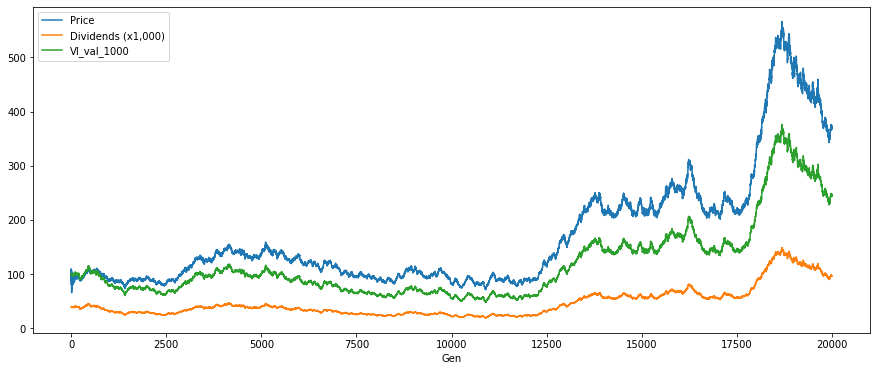

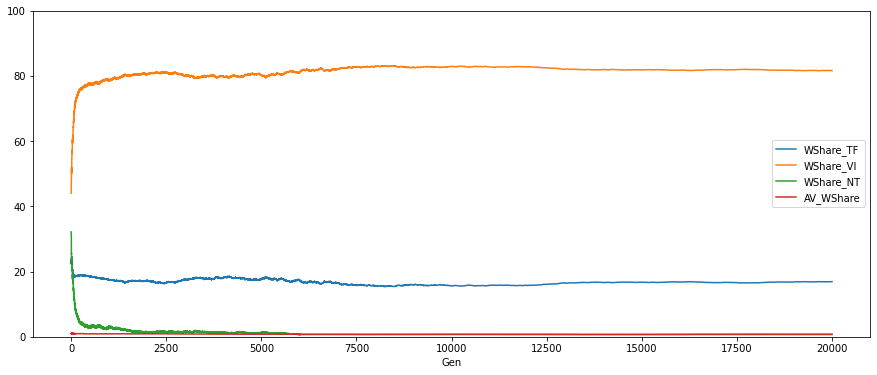

In [227]:
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df['PriceEma'] = pd.Series.ewm(df['Price'], span=21).mean()

df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()
# df.plot(x="Gen", y = ['PriceEma', 'Dividends (x1,000)', 'VI_val_1000'],
#         kind="line", figsize=(15, 6))
# plt.show()


df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT", "AV_WShare"],
        kind="line", figsize=(15, 6), ylim=(0,100))
# plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()






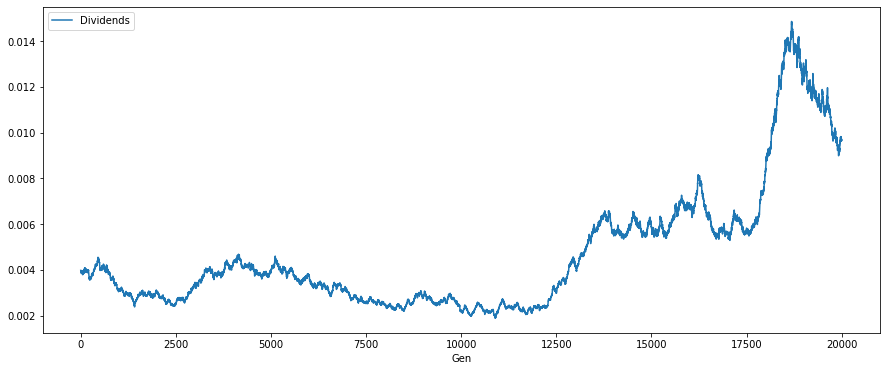

In [228]:
df.plot(x="Gen", y = ['Dividends'],
        kind="line", figsize=(15, 6))
plt.show()

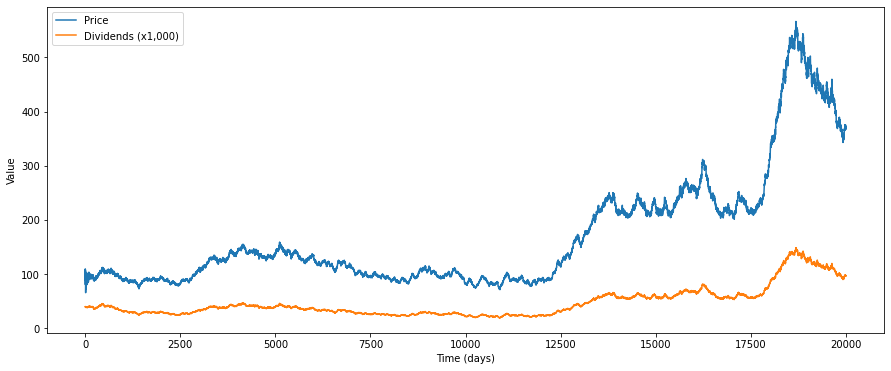

In [229]:
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)'],
        kind="line", figsize=(15, 6))
plt.xlabel('Time (days)')
plt.ylabel('Value')
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/price_series.png', dpi = 300)
plt.show()

0.032159892452067594
20000
0.032159892452067594
nan


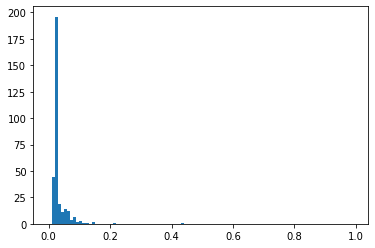

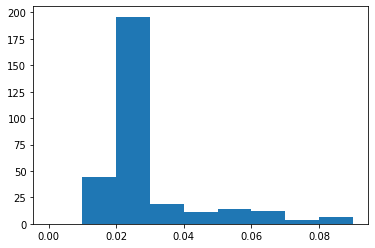

In [230]:
pct_changes = list(df['nav_pct'])
# print(pct_changes)
print(np.nanmean(pct_changes))
print(len(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 100:
        pct_changes[i] = np.nan
print(np.nanmean(pct_changes))
print(max(pct_changes))
bins = range(0,100)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()
bins = range(0,10)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()


short volume ratio
0.9177846977237576
Short ratio (numb short sold / avg rolling volume)
412834.7247646423
0.3910639679993472
Short % of float 
0.9074491006068613


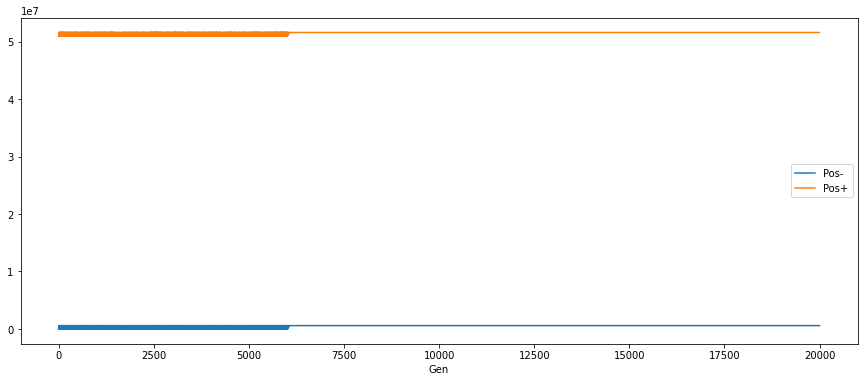

In [231]:
# Calibration of short volume ratio

print('short volume ratio')
asset_supply = df["Pos+"].mean() - df["Pos-"].mean()
# Average short volume ratio in our ABM:
print(100 * df["Pos-"].mean() / asset_supply)

print('Short ratio (numb short sold / avg rolling volume)')
# Short interest ratio as days to cover
df["short_ratio"] = df["Pos-"] / (df["Volume"] + 1)
print(df["short_ratio"].mean())
print(df["Pos-"].mean() / df["Volume"].mean())

# Short interest as percentage of float (outstanding)
print('Short % of float ')
df["FloatPer"] = df["Pos-"] / df["Pos+"]
# df["FloatPer"] = df["Pos-"] / asset_supply
print(100 * df["FloatPer"].mean())

df.plot(x="Gen", y = ["Pos-", "Pos+"],
        kind="line", figsize=(15, 6))
plt.show()

# the short volume ratio and short percentage of float are consistent after limiting max short size
# However, the short ratio (to volumne) is higher. It mostly means that the short positions are liquidated much faster in our model. 
# But siunce they still occupy the same relative amount to outstanding shares, it just means that they are closed/opened at higher frequencies
# than in regular data. Which makes sense because not all happens at a daily scale, and there are some funds who maintain short positions
# over long time horizons.

In [232]:
print(df['WShare_VI'].iloc[-1])
print(df['WShare_NT'].iloc[-1])
print(df['WShare_TF'].iloc[-1])

81.59899161694294
0.6833780031083924
16.92500745083666


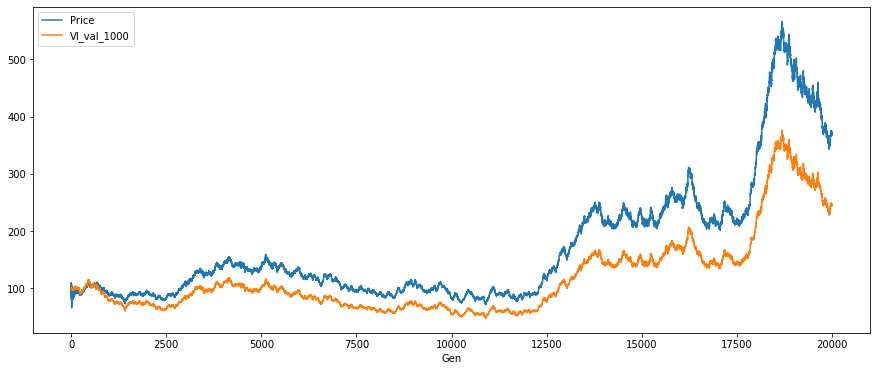

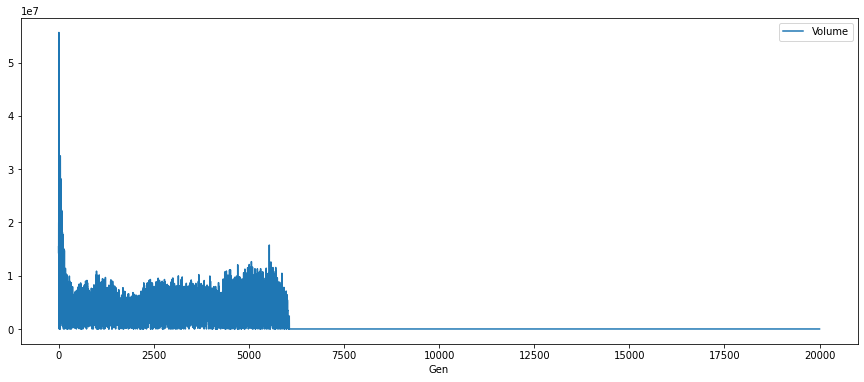

In [233]:


df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df.plot(x="Gen", y = ['Price', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

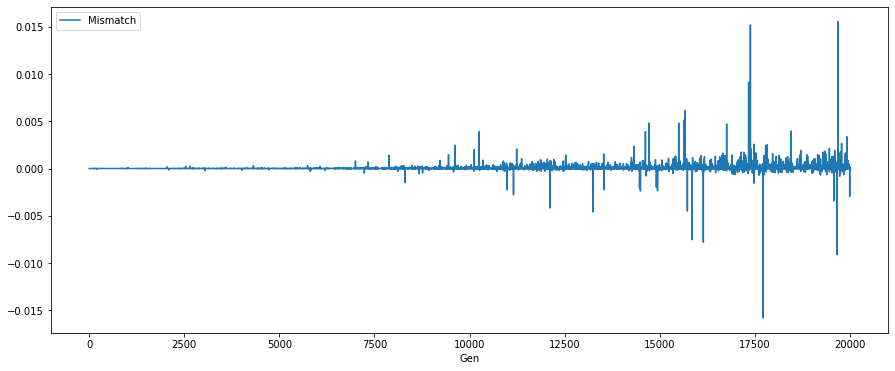

In [234]:

df.plot(x="Gen", y = ["Mismatch"],
        kind="line", figsize=(15, 6))
plt.show()


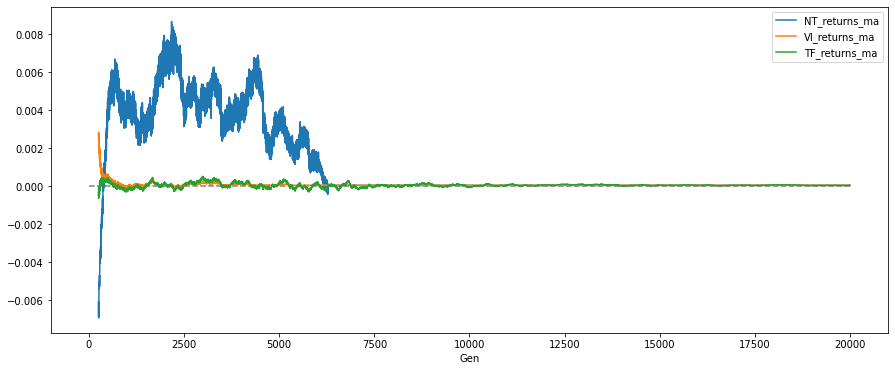

In [235]:
df["NT_returns_ma"] = df["NT_returns"].rolling(252*1).mean()
df["VI_returns_ma"] = df["VI_returns"].rolling(252*1).mean()
df["TF_returns_ma"] = df["TF_returns"].rolling(252*1).mean()

df.plot(x="Gen", y = ["NT_returns_ma", "VI_returns_ma", "TF_returns_ma"],
        kind="line", figsize=(15, 6))
plt.hlines(y=0, xmin = 0, xmax = max(df["Gen"]), colors='gray', linestyles='dashed')
plt.show()

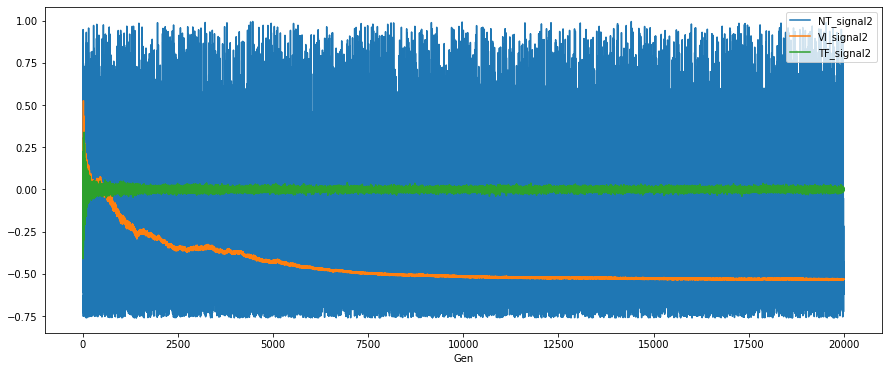

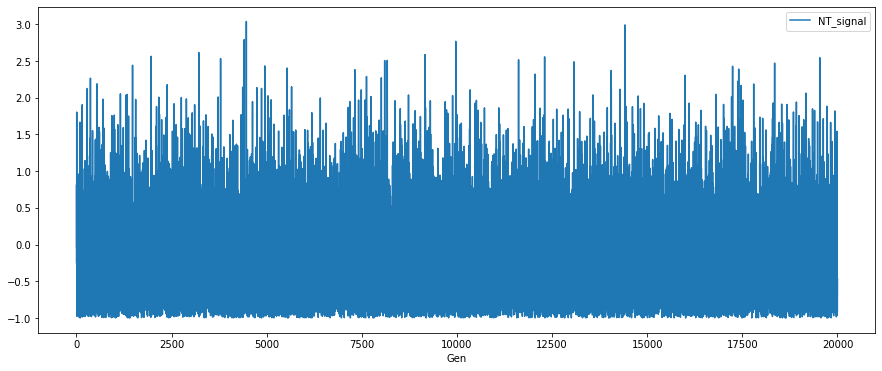

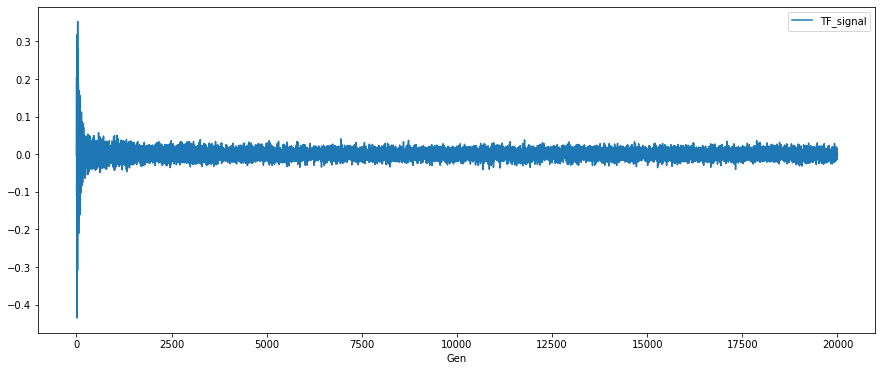

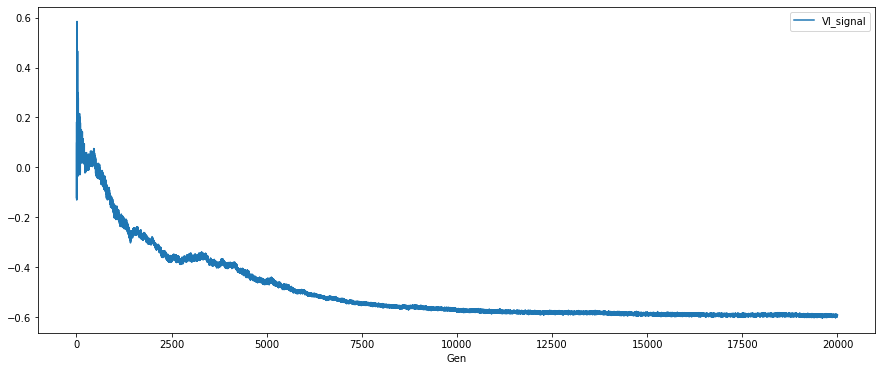

In [236]:
df['NT_signal2'] = np.tanh(df['NT_signal'])
df['VI_signal2'] = np.tanh(df['VI_signal'])
df['TF_signal2'] = np.tanh(df['TF_signal'])

df.plot(x="Gen", y=["NT_signal2", "VI_signal2", "TF_signal2"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y=["NT_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["TF_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["VI_signal"],
        kind="line", figsize=(15, 6))
plt.show()


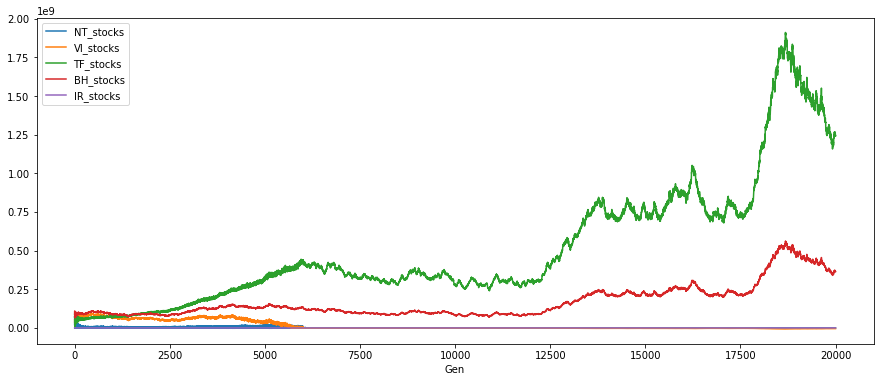

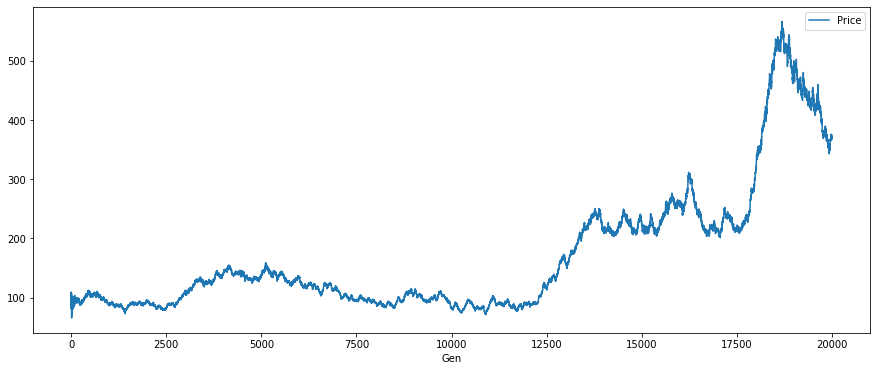

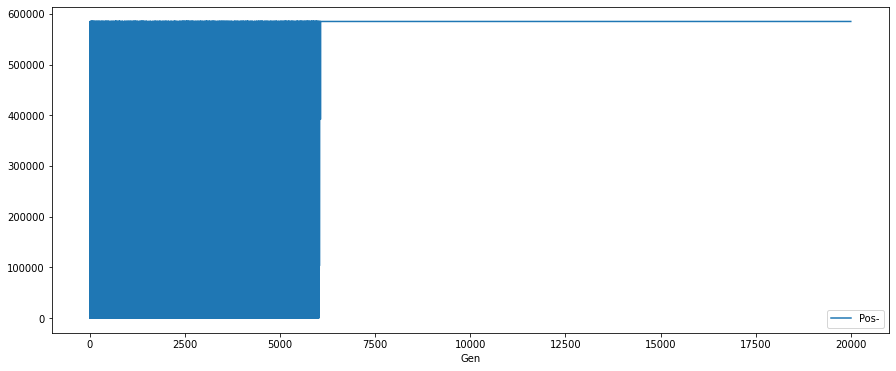

In [237]:
df.plot(x="Gen", y = ["NT_stocks", "VI_stocks", "TF_stocks", "BH_stocks", "IR_stocks"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()


df.plot(x="Gen", y = ["Pos-"],
        kind="line", figsize=(15, 6))
plt.show()


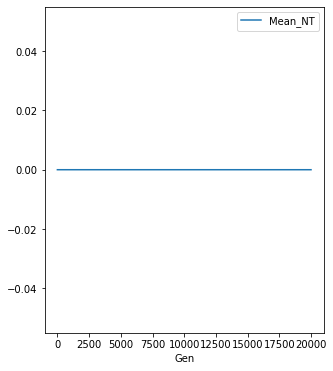

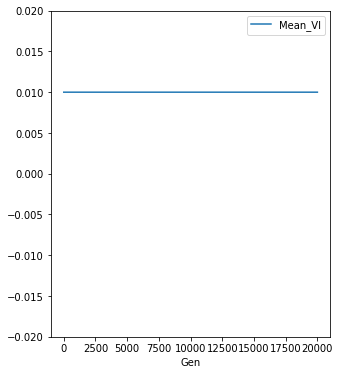

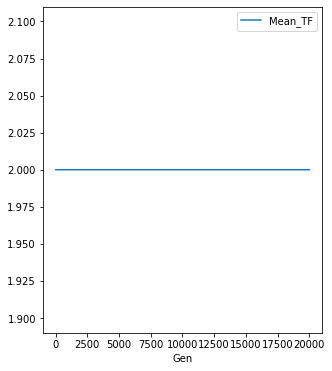

In [238]:

df.plot(x="Gen", y = ["Mean_NT"],
        kind="line", figsize=(5, 6))
plt.show()
df.plot(x="Gen", y = ["Mean_VI"],
        kind="line", figsize=(5, 6), ylim=(-0.02, 0.02))
plt.show()
df.plot(x="Gen", y = ["Mean_TF"],
        kind="line", figsize=(5, 6))
plt.show()

In [239]:
if df["Spoils"].sum() != 0:
        df.plot(x="Gen", y = ["Spoils"],
                kind="line", figsize=(15, 6))
        plt.show()


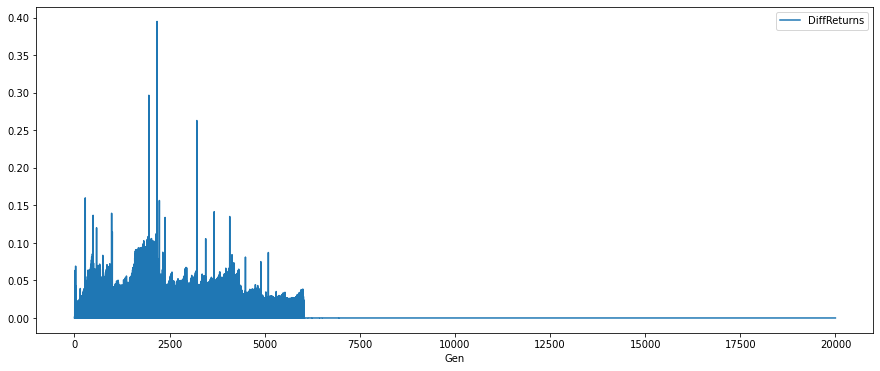

In [240]:
df.plot(x="Gen", y = ["DiffReturns"],
        kind="line", figsize=(15, 6))
plt.show()




3.432814499061626e-08
1.708122020452936e-08


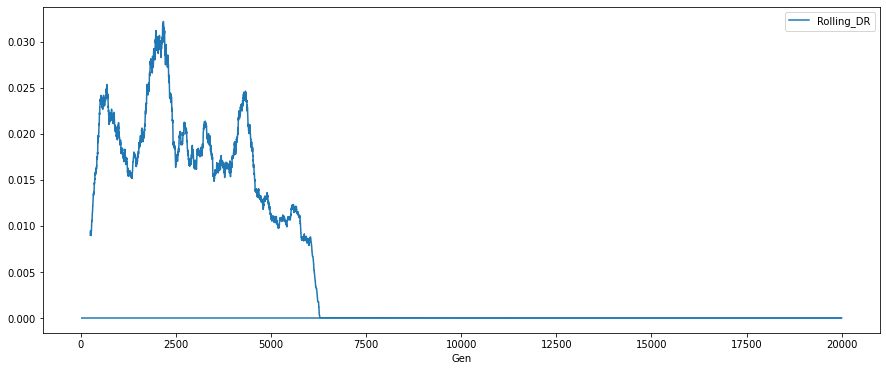

10061


In [241]:

avg = df.tail(1000)["DiffReturns"].mean()
print(avg)


avg = df.tail(252)["DiffReturns"].mean()
print(avg)

# what is the first time after which we have spent 252 days with negligeable diff returns?
df["Rolling_DR"] = df["DiffReturns"].rolling(252).mean()

tol = 0.000001

df.plot(x="Gen", y = ["Rolling_DR"],
        kind="line", figsize=(15, 6))
plt.hlines(y=tol, xmin = 0, xmax = 20000)
plt.show()

for i in range(len(df["Gen"])):
    if df["Rolling_DR"].iloc[i] <= tol:
        print(i)
        break


In [242]:
SharpeNT = np.nanmean(df['NT_returns']) / np.nanstd(df['NT_returns'])
SharpeVI = np.nanmean(df['VI_returns']) / np.nanstd(df['VI_returns'])
SharpeTF = np.nanmean(df['TF_returns']) / np.nanstd(df['TF_returns'])

print('Daily Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Daily mean returns 2 ')
print([np.nanmean(df['NT_returns']), np.nanmean(df['VI_returns']), np.nanmean(df['TF_returns'])])

DiffSharpe = (SharpeNT - SharpeVI) ** 2  + (SharpeNT - SharpeTF) ** 2 + (SharpeVI - SharpeTF) ** 2
print(DiffSharpe)



Daily Sharpe ratios 
0.022071756323924347 0.02117125179867052 0.009711278539864138
Daily mean returns 2 
[0.0011078563857514377, 8.715598822851883e-05, 3.8282661211909326e-05]
0.000284923306542806


0.0


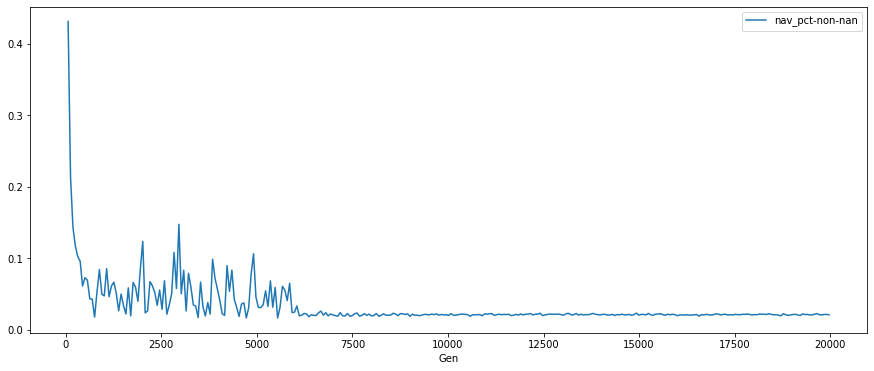

In [243]:
print(df['Rep'].sum())
if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

df2 = pd.DataFrame()
df2['nav_pct-non-nan'] = df['nav_pct'].dropna()
df2['nav_pct-non-nan'] = df2['nav_pct-non-nan'][df2['nav_pct-non-nan'] <1000]
df2['Gen'] = df['Gen']
df2.plot(x="Gen", y = ['nav_pct-non-nan'],
                kind="line", figsize=(15, 6))
plt.show()

In [244]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [245]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

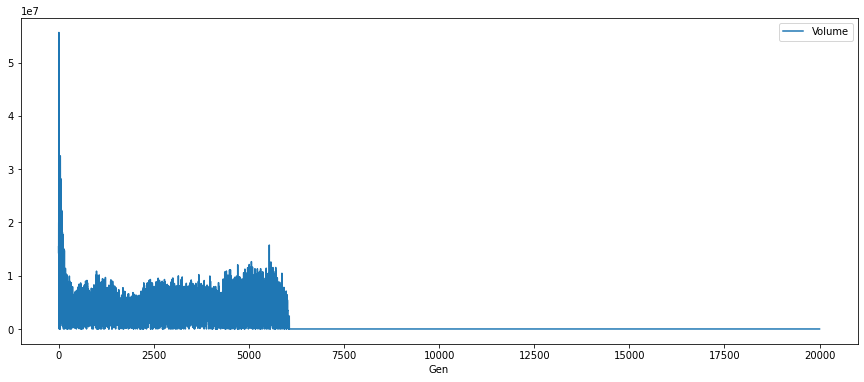

In [246]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()


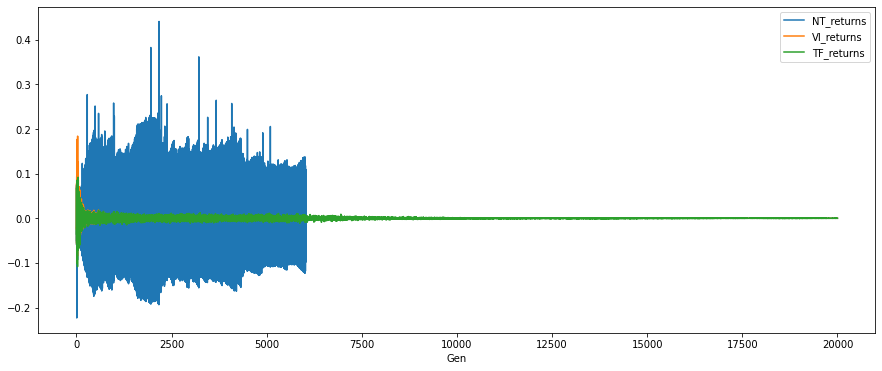

In [247]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns"],
        kind="line", figsize=(15, 6))
plt.show()

# df['DiffReturns'] = (df['NT_returns'] - df['VI_returns']) ** 2 + (df['NT_returns'] - df['TF_returns']) ** 2 + (df['VI_returns'] - df['TF_returns']) ** 2



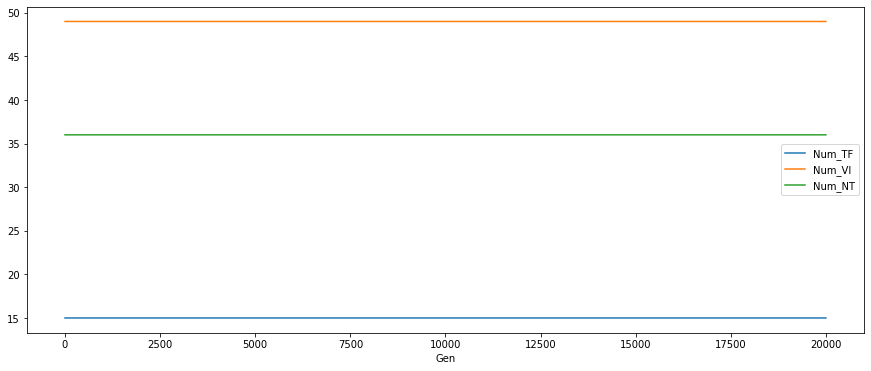

In [248]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


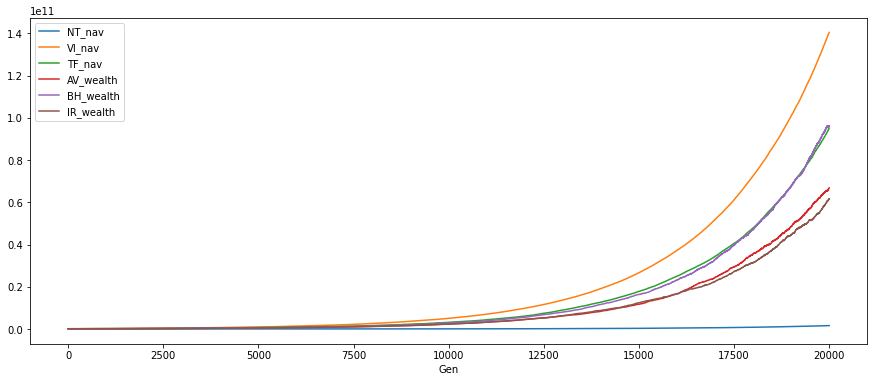

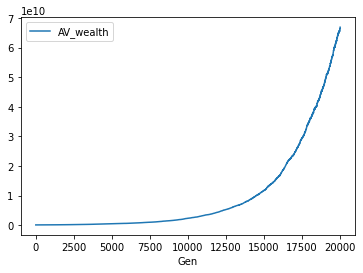

18.749735399963996
1635.5702313237969


In [249]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav", "AV_wealth", "BH_wealth", "IR_wealth"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y="AV_wealth")
plt.show()

NT_mul = df["NT_nav"].iloc[-1] / df["NT_nav"].iloc[0]  
print(NT_mul)
NT_mul = df["VI_nav"].iloc[-1] / df["VI_nav"].iloc[0]  
print(NT_mul)


In [250]:
# How to get the yearly returns/Sharpe?

from scipy import stats

print('Daily returns (geometric mean)')

NT_return =  stats.gmean(df["NT_returns"].add(1)) - 1
print(round(100 * NT_return, 3))
VI_return =  stats.gmean(df["VI_returns"].add(1)) - 1
print(round(100 * VI_return, 3))
TF_return =  stats.gmean(df["TF_returns"].add(1)) - 1
print(round(100 * TF_return, 3))
BH_return =  stats.gmean(df["BH_return"].add(1)) - 1
print(round(100 * BH_return, 3))
IR_return =  stats.gmean(df["IR_return"].add(1)) - 1
print(round(100 * IR_return, 3))

print('Percentage annual return')
def annualise_return(daily_return):
    return 100 * ((daily_return + 1) ** 252 - 1)

print(annualise_return(NT_return))
print(annualise_return(VI_return))
print(annualise_return(TF_return))
print(annualise_return(BH_return))
print(annualise_return(IR_return))

print('Daily Sharpe ratios')
print(NT_return / np.std(df["NT_returns"]))
print(VI_return / np.std(df["VI_returns"]))
print(TF_return / np.std(df["TF_returns"]))
print(BH_return / np.std(df["BH_return"]))
print(IR_return / np.std(df["IR_return"]))

print('Annualised sharpe ratios')
print(np.sqrt(252) * NT_return / np.std(df["NT_returns"]))
print(np.sqrt(252) * VI_return / np.std(df["VI_returns"]))
print(np.sqrt(252) * TF_return / np.std(df["TF_returns"]))
print(np.sqrt(252) * BH_return / np.std(df["BH_return"]))
print(np.sqrt(252) * IR_return / np.std(df["IR_return"]))

Daily returns (geometric mean)
-0.014
0.008
0.003
0.004
0.004
Percentage annual return
-3.48648088564415
2.0086926958021056
0.7710291288555382
1.0365869396947058
1.0176608796325093
Daily Sharpe ratios
-0.0028053866935043134
0.019171392321293668
0.007731828985251094
0.005258275873859808
0.5682237432333945
Annualised sharpe ratios
-0.04453413313429316
0.3043364182139781
0.12273898004793171
0.08347254172322337
9.020272281826697


In [251]:
import numpy as np
max_generations = 10
dividend_series = np.zeros((1, max_generations))
rd_dividend_series = np.zeros((1, max_generations))
z_process = np.random.random(max_generations)

print(dividend_series)
print(dividend_series[0, 0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.0


In [252]:
print(z_process)
print(z_process[0])

[0.16139159 0.56693258 0.34877297 0.61041893 0.71166397 0.60487441
 0.86150382 0.98121741 0.56664645 0.87323313]
0.1613915887091586
